# Tarea 2

Diego Lozoya Morales | 745345

## Packages

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from IPython.display import display

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum"]

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

## Data

In [55]:
df = pd.read_csv('Data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Variable dependiente

In [56]:
target = 'cnt'
y = df[target]

## Limpieza de datos

In [57]:
df = df.drop(columns=["casual", "registered", "instant", "dteday", "mnth", "yr"])
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Análisis vibariado por variable

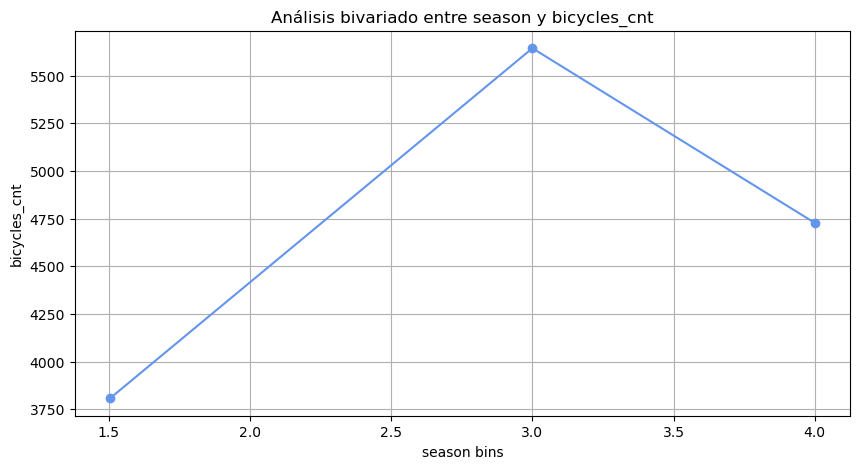

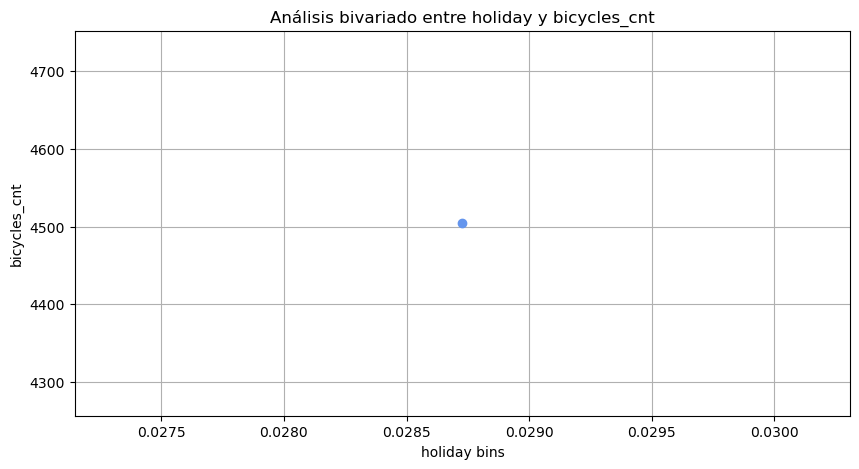

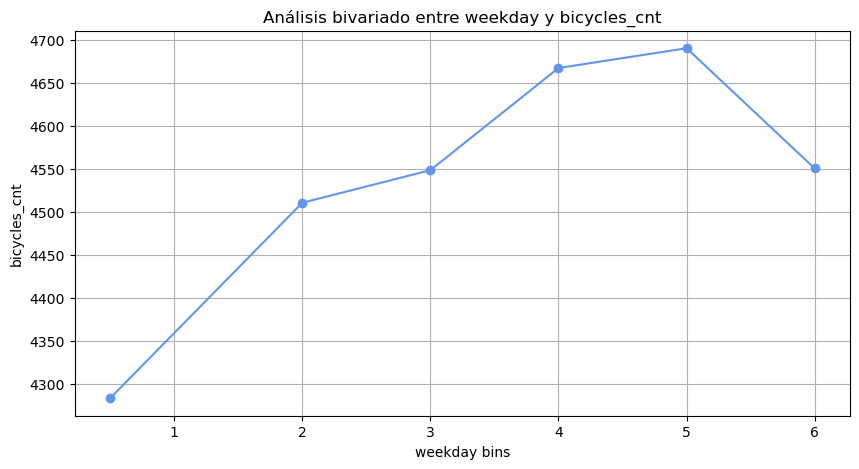

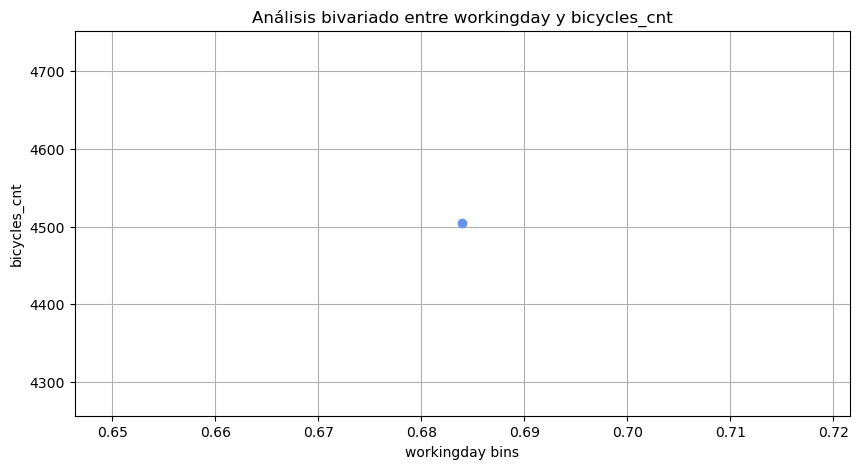

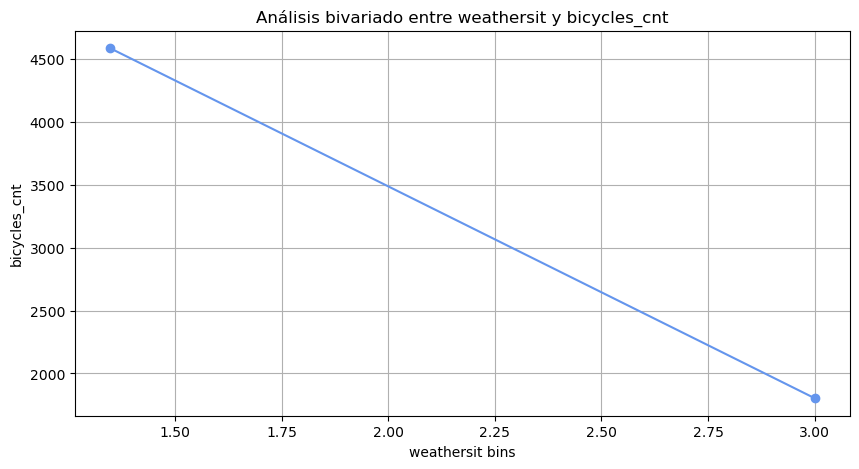

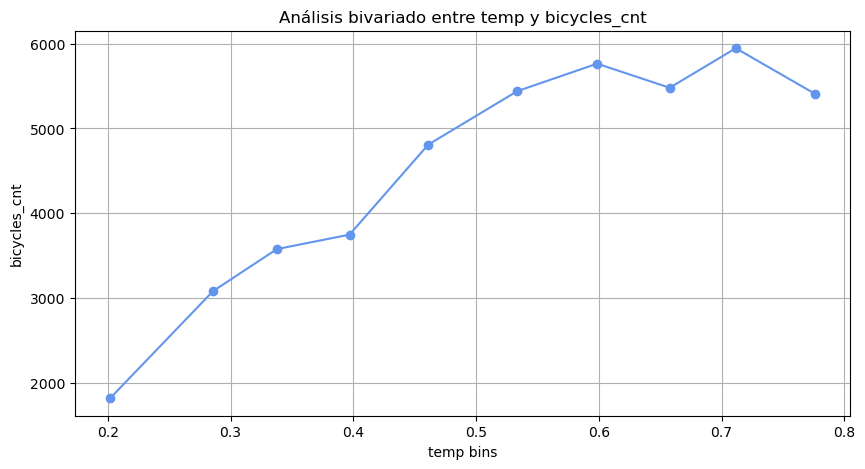

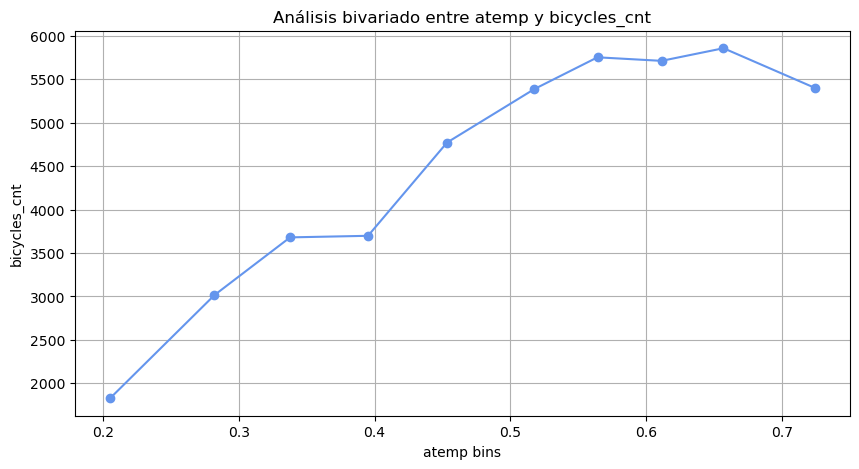

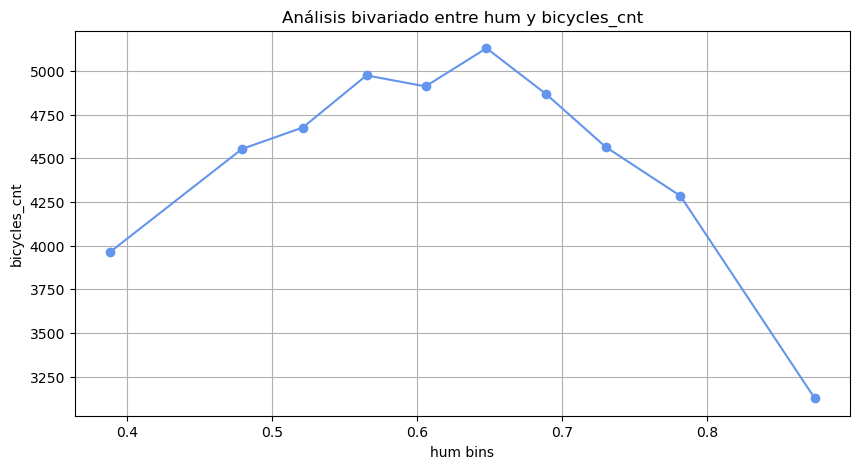

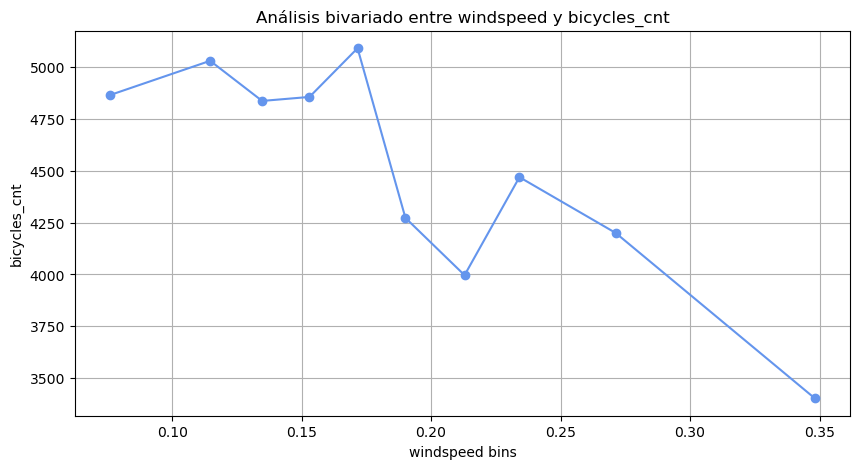

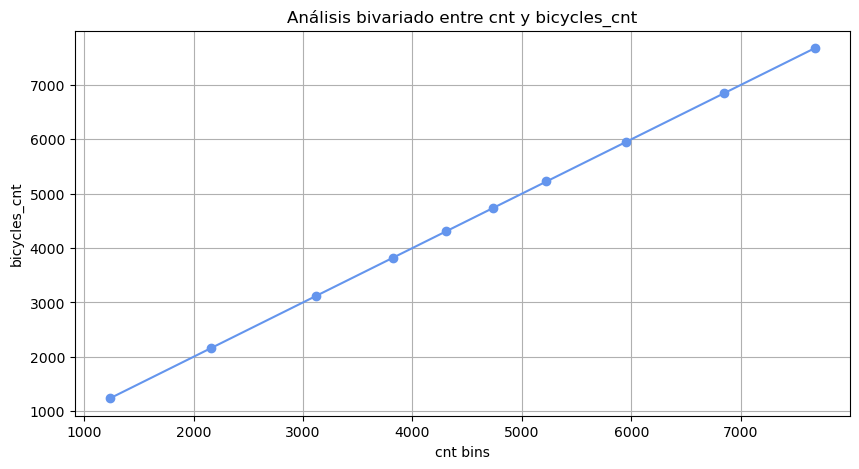

In [58]:
for i in df.keys():
     X = df[[i]]
     model = linear_model.LinearRegression().fit(X, y)

     if len(X.iloc[:, 0].unique()) < 5:
          q = len(X.iloc[:, 0].unique())
     else:
          q = 10

     df[X.keys()[0] + str("bin")] = pd.qcut(df[X.keys()[0]], q=q, labels=False, duplicates="drop") + 1
     grouped = df.groupby((X.keys()[0] + str("bin"))).mean()

     plt.figure(figsize=(10,5))
     plt.plot(grouped[X.keys()[0]].values, grouped.cnt.values, color=colors[0], marker='o')
     plt.xlabel(f"{X.keys()[0]} bins")
     plt.ylabel("bicycles_cnt")
     plt.title(f"Análisis bivariado entre {X.keys()[0]} y bicycles_cnt")
     plt.grid()
     plt.show()

     df = df.drop(columns=[X.keys()[0] + str("bin")])

     print()

## Regresión lineal múltiple

In [59]:
X = df.copy().drop(target, axis=1)

X = pd.get_dummies(X, columns=["season", "weekday", "weathersit"])
X.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.363625,0.805833,0.160446,True,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,0,0.363478,0.353739,0.696087,0.248539,True,False,False,False,True,False,False,False,False,False,False,False,True,False
2,0,1,0.196364,0.189405,0.437273,0.248309,True,False,False,False,False,True,False,False,False,False,False,True,False,False
3,0,1,0.200000,0.212122,0.590435,0.160296,True,False,False,False,False,False,True,False,False,False,False,True,False,False
4,0,1,0.226957,0.229270,0.436957,0.186900,True,False,False,False,False,False,False,True,False,False,False,True,False,False


In [60]:
model = linear_model.LinearRegression().fit(X, y)
predicciones = model.predict(X)

r2 = r2_score(y_true=y, y_pred=predicciones)
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_true=y, y_pred=predicciones)
print(f"MSE: {mse:,.4f}")

coeficientes = pd.DataFrame({
     'names': X.keys(),
     'coeficientes': model.coef_
})

print()
print(f"Intercepto del modelo: {model.intercept_:,.2f}\nCoeficientes del modelo:")
display(coeficientes)

R² Score: 0.5633
MSE: 1,636,763.8098

Intercepto del modelo: -46,770,486,503,572,056.00
Coeficientes del modelo:


,names,coeficientes
0,holiday,2.476933e+16
1,workingday,2.476933e+16
2,temp,5.434741e+03
3,atemp,9.043608e+02
4,hum,-2.479033e+03
5,windspeed,-3.172996e+03
6,season_1,-4.031178e+16
7,season_2,-4.031178e+16
8,season_3,-4.031178e+16
9,season_4,-4.031178e+16


## Gráficos

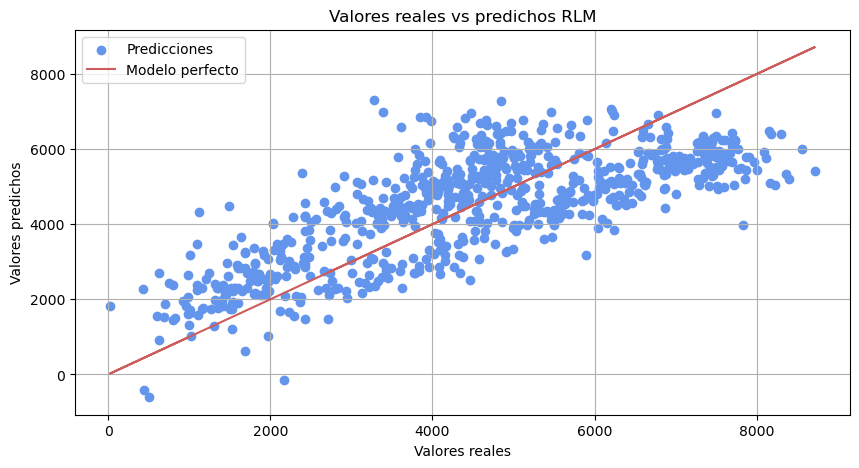

In [61]:
plt.figure(figsize=(10, 5))
plt.scatter(y, predicciones, color=colors[0], label="Predicciones")
plt.plot(y, y, color=colors[1], label="Modelo perfecto")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs predichos RLM")
plt.grid()
plt.legend()
plt.show()

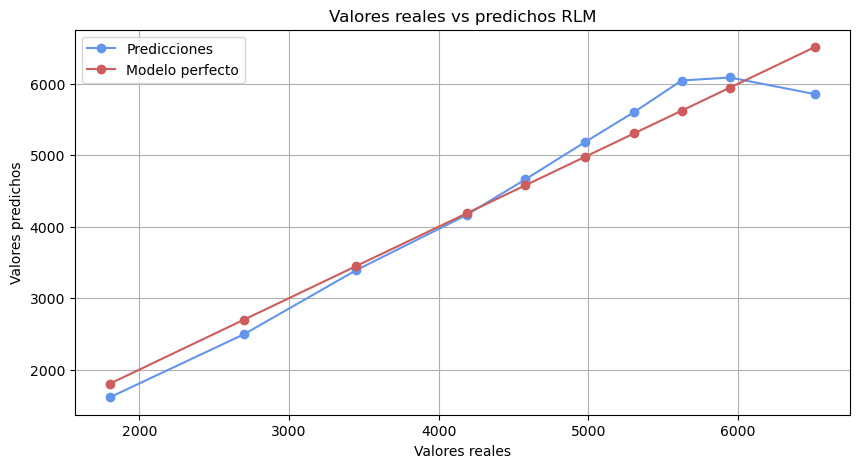

In [62]:
calibracion = pd.DataFrame({
     'predicciones': predicciones,
     'real': y
})

calibracion['bins'] = pd.qcut(calibracion['predicciones'], q=10, labels=False)
grouped_calibracion = calibracion.groupby('bins').mean()
grouped_calibracion["error"] = (grouped_calibracion.predicciones - grouped_calibracion.real) / grouped_calibracion.predicciones

plt.figure(figsize=(10, 5))
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.real.values, marker='o', color=colors[0], label="Predicciones")
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.predicciones.values, marker='o', color=colors[1], label="Modelo perfecto")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs predichos RLM")
plt.grid()
plt.legend()
plt.show()

## Conclusión

Al hacer un modelo de regresión lineal multiple (RLM), utilizando todas las variables disponibles, se obtiene en modelo con R2 de 0.5633, lo que quiere decir que el 56.33% de la variación de los datos sobre la renta de bicicletas, es explicada por el modelo construido con base en todos los datos disponibles. El modelo tiene un error tipo MSE de 1,636,763.8098. El modelo tiene un ajuste  moderado, ya que aunque explica una parte significativa de la variabilidad en la renta de bicicletas, todavía deja un 43.67% de la variabilidad sin explicar. Tener un MSE tan alto indica que hay otros factores que influyen en la predicción y que no han sido considerados en el modelo.